## Installing Reqiurements Libraries ##

In [2]:
# %pip install numpy
# %pip install pandas 
# %pip install seaborn
# %pip install scikit-learn

## Importing Libraries ##

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Importing Data ##

In [4]:
loan_dataframe = pd.read_csv("../data/loan.csv")
loan_dataframe

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Analysis by married status ##


In [5]:
married_status = ( loan_dataframe
    .query("Married == 'Yes'")
    .groupby(["Gender", "Loan_Status"] , as_index = False)
    .agg(
        total_married_status = ("Loan_Status" , "count"))
    .pivot_table(index = "Gender" , columns = "Loan_Status" , values = "total_married_status")
    .reset_index()
    .dropna()
    .rename(columns = { "N" : "Unapproved" ,"Y" : "Approved"} )
    .rename_axis("Married", axis=1)
)
unmarried_status = ( loan_dataframe
    .query("Married == 'No'")
    .groupby(["Gender", "Loan_Status"] , as_index = False)
    .agg(
        total_unmarried_status = ("Loan_Status" , "count"))
    .pivot_table(index = "Gender" , columns = "Loan_Status" , values = "total_unmarried_status")
    .reset_index()
    .dropna()
    .rename(columns = {"N" : "Unapproved" ,"Y" : "Approved"} )
    .rename_axis("Unmarried", axis=1)
)
unmarried_status

Unmarried,Gender,Unapproved,Approved
0,Female,29.0,51.0
1,Male,49.0,81.0


## Approve Rate for married and unmarried customers ##

In [6]:
married_status["total_count"] = married_status["Approved"] + married_status["Unapproved"]
married_status["Approved_rate"] = ((married_status["Approved"] / married_status["total_count"]) * 100 ).round(2)

unmarried_status["total_count"] = unmarried_status["Approved"] + unmarried_status["Unapproved"]
unmarried_status["Approved_rate"] = ((unmarried_status["Approved"] / unmarried_status["total_count"]) * 100 ).round(2)


total_approved_status = pd.merge(married_status, unmarried_status, on="Gender", how="outer", suffixes=("_Married","_Unmarried"))
total_approved_status


,Gender,Unapproved_Married,Approved_Married,total_count_Married,Approved_rate_Married,Unapproved_Unmarried,Approved_Unmarried,total_count_Unmarried,Approved_rate_Unmarried
0,Female,8.0,23.0,31.0,74.19,29.0,51.0,80.0,63.75
1,Male,101.0,256.0,357.0,71.71,49.0,81.0,130.0,62.31


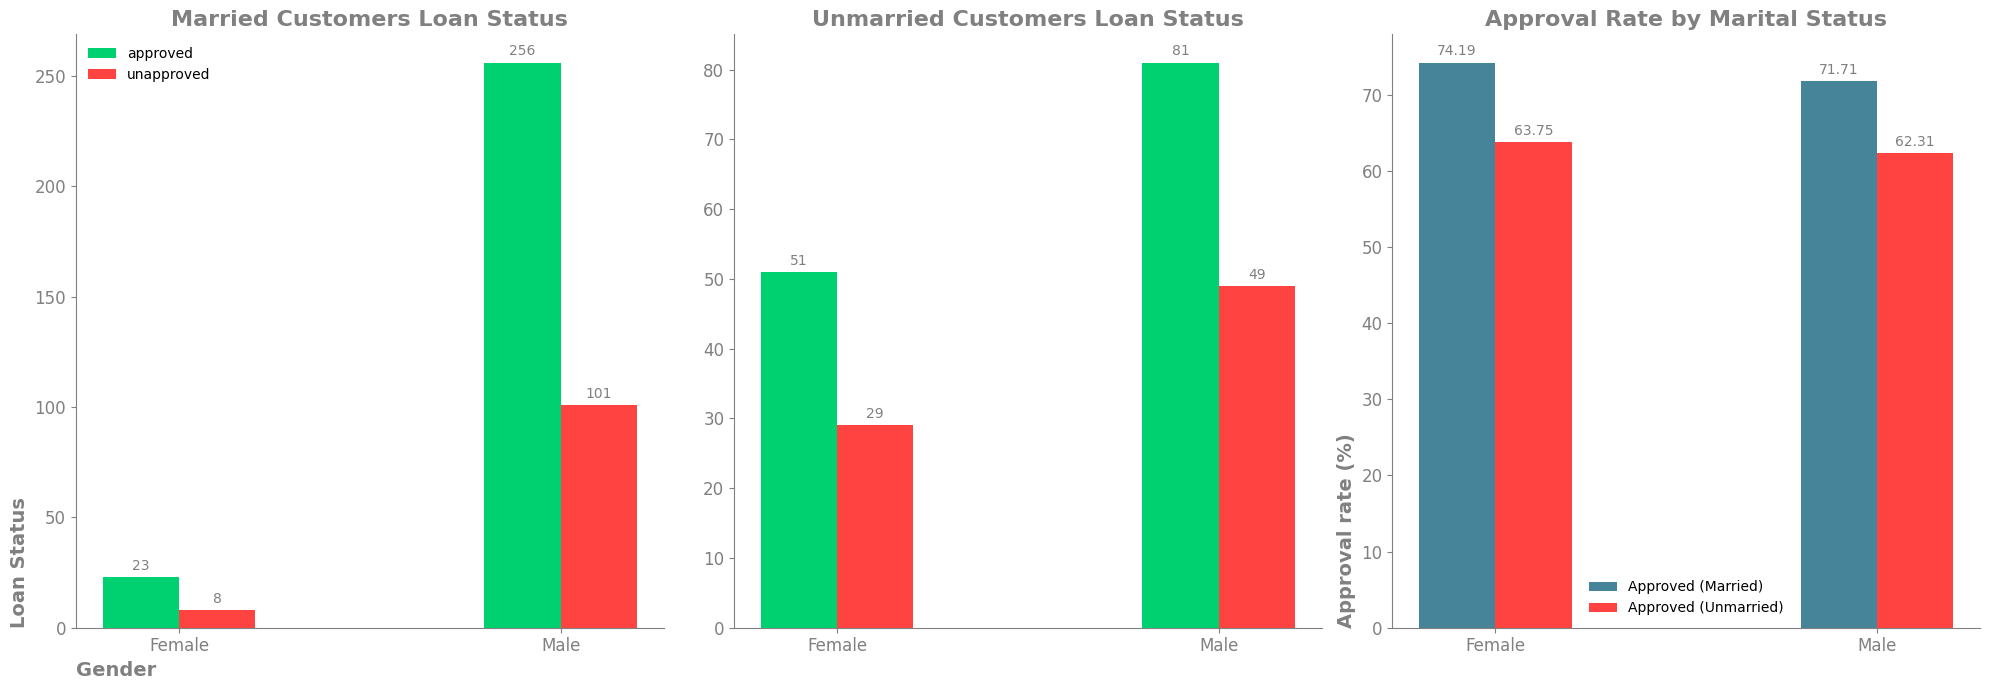

In [7]:
fig,ax = plt.subplots(1,3 ,figsize=(20,7))

x = np.arange(len(married_status["Gender"]))
Approved_bars = ax[0].bar(
    data = married_status , 
    x = x- 0.1 ,
    height = married_status["Approved"] ,
    width = 0.2 ,
    color = "#00D170" , 
    label = "approved"
)

Uanpproved_bars = ax[0].bar(
    data = married_status , 
    x = x + 0.1 ,
    height = married_status["Unapproved"] ,
    width = 0.2 ,
     color = "#FF4340" ,
     label = "unapproved"
)

ax[0].spines[["right" , "top"]].set_visible(False)
ax[0].spines[["left" , "bottom"]].set_color('gray')  

ax[0].set_xticks( x , [ "Female" , "Male" ])

ax[0].bar_label(Approved_bars , padding= 3 , alpha = 0.5)
ax[0].bar_label(Uanpproved_bars , padding= 3 , alpha = 0.5)

ax[0].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[0].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[0].set_title("Married Customers Loan Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)
ax[0].set_xlabel(
    "Gender",
    loc="left",
    weight="bold",
    fontsize=14,
    color="gray",
)
ax[0].set_ylabel(
    "Loan Status",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="gray",
)

##for unmarried
x = np.arange(len(unmarried_status["Gender"]))
Approved_bars = ax[1].bar(
    data = unmarried_status , 
    x = x- 0.1 ,
    height = unmarried_status["Approved"] ,
    width = 0.2 ,
    color = "#00D170" , 
    label = "'Approved'"
)

Uanpproved_bars = ax[1].bar(
    data = unmarried_status , 
    x = x + 0.1 ,
    height = unmarried_status["Unapproved"] ,
    width = 0.2 ,
     color = "#FF4340" ,
     label = "'Unapproved'"
)

ax[1].spines[["right" , "top"]].set_visible(False)
ax[1].spines[["left" , "bottom"]].set_color('gray')  

ax[1].set_xticks( x , [ "Female" , "Male" ])

ax[1].bar_label(Approved_bars , padding= 3 , alpha = 0.5)
ax[1].bar_label(Uanpproved_bars , padding= 3 , alpha = 0.5)

ax[1].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[1].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[1].set_title("Unmarried Customers Loan Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)

##for approval rate

x = np.arange(len(total_approved_status["Gender"]))
Approved_bars = ax[2].bar(
    data = total_approved_status , 
    x = x- 0.1 ,
    height = total_approved_status["Approved_rate_Married"] ,
    width = 0.2 ,
    color = "#468499" , 
    label = "Approved (Married)"
)

Uanpproved_bars = ax[2].bar(
    data = total_approved_status , 
    x = x + 0.1 ,
    height = total_approved_status["Approved_rate_Unmarried"] ,
    width = 0.2 ,
     color = "#FF4340" ,
     label = "Approved (Unmarried)"
)

ax[2].spines[["right" , "top"]].set_visible(False)
ax[2].spines[["left" , "bottom"]].set_color('gray')  

ax[2].set_xticks( x , [ "Female" , "Male" ])

ax[2].bar_label(Approved_bars , padding= 3 , alpha = 0.5)
ax[2].bar_label(Uanpproved_bars , padding= 3 , alpha = 0.5)

ax[2].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[2].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[2].set_title("Approval Rate by Marital Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)

ax[2].set_ylabel(
    "Approval rate (%)",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="gray",
)

ax[0].legend(frameon=False, loc='best')

ax[2].legend(frameon=False, loc="upper right", title="Approval Rate")



plt.legend(frameon = False)
plt.tight_layout()
plt.show()

## Analysis by Education Status ##


In [8]:
graduate_status = ( loan_dataframe
    .query("Education == 'Graduate'")
    .groupby(["Gender", "Loan_Status"] , as_index = False)
    .agg(
        total_graduate_status = ("Loan_Status" , "count"))
    .pivot_table(index = "Gender" , columns = "Loan_Status" , values = "total_graduate_status")
    .reset_index()
    .dropna()
    .rename(columns = { "N" : "Unapproved" ,"Y" : "Approved"} )
    .rename_axis("graduate", axis=1)
)
ungraduate_status = ( loan_dataframe
    .query("Education == 'Not Graduate'")
    .groupby(["Gender", "Loan_Status"] , as_index = False)
    .agg(
        total_ungraduate_status = ("Loan_Status" , "count"))
    .pivot_table(index = "Gender" , columns = "Loan_Status" , values = "total_ungraduate_status")
    .reset_index()
    .dropna()
    .rename(columns = {"N" : "Unapproved" ,"Y" : "Approved"} )
    .rename_axis("ungraduate", axis=1)
)
ungraduate_status

ungraduate,Gender,Unapproved,Approved
0,Female,6.0,14.0
1,Male,45.0,68.0


## Approve Rate for graduate and ungraduate customers ##

In [9]:
graduate_status["total_count"] = graduate_status["Approved"] + graduate_status["Unapproved"]
graduate_status["Approved_rate"] = ((graduate_status["Approved"] / graduate_status["total_count"]) * 100 ).round(2)

ungraduate_status["total_count"] = ungraduate_status["Approved"] + ungraduate_status["Unapproved"]
ungraduate_status["Approved_rate"] = ((ungraduate_status["Approved"] / ungraduate_status["total_count"]) * 100 ).round(2)


total_approved_status_g = pd.merge(graduate_status, ungraduate_status, on="Gender", how="outer", suffixes=("_graduate","_ungraduate"))
total_approved_status_g


,Gender,Unapproved_graduate,Approved_graduate,total_count_graduate,Approved_rate_graduate,Unapproved_ungraduate,Approved_ungraduate,total_count_ungraduate,Approved_rate_ungraduate
0,Female,31.0,61.0,92.0,66.30,6.0,14.0,20.0,70.00
1,Male,105.0,271.0,376.0,72.07,45.0,68.0,113.0,60.18


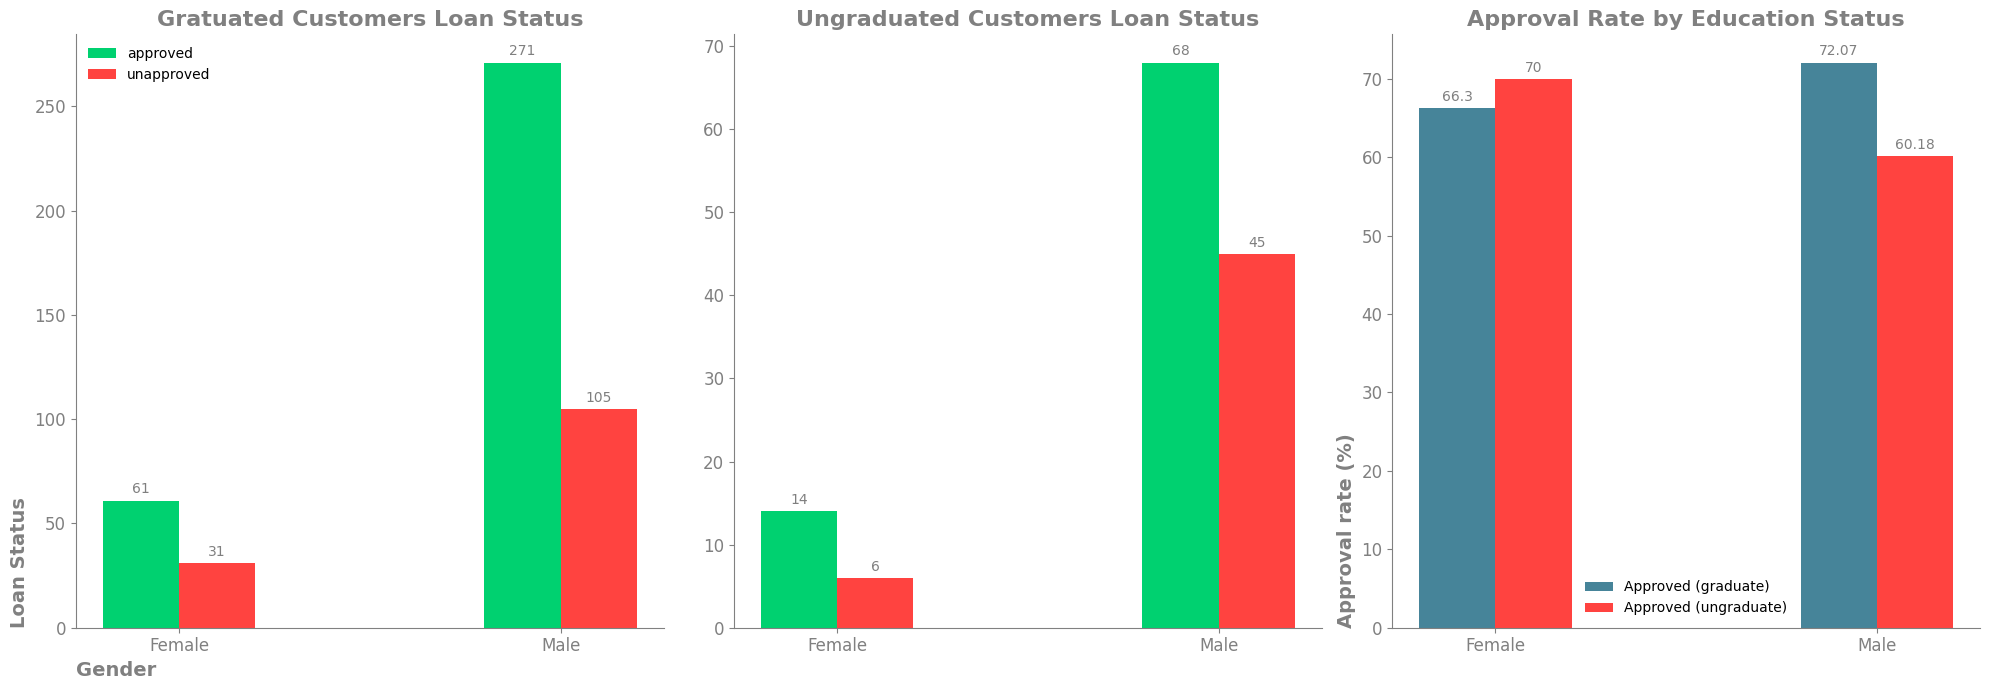

In [10]:
fig,ax = plt.subplots(1,3 ,figsize=(20,7))

x = np.arange(len(graduate_status["Gender"]))
Approved_bars = ax[0].bar(
    data = graduate_status , 
    x = x- 0.1 ,
    height = graduate_status["Approved"] ,
    width = 0.2 ,
    color = "#00D170" , 
    label = "approved"
)

Uanpproved_bars = ax[0].bar(
    data = graduate_status , 
    x = x + 0.1 ,
    height = graduate_status["Unapproved"] ,
    width = 0.2 ,
     color = "#FF4340" ,
     label = "unapproved"
)

ax[0].spines[["right" , "top"]].set_visible(False)
ax[0].spines[["left" , "bottom"]].set_color('gray')  

ax[0].set_xticks( x , [ "Female" , "Male" ])

ax[0].bar_label(Approved_bars , padding= 3 , alpha = 0.5)
ax[0].bar_label(Uanpproved_bars , padding= 3 , alpha = 0.5)

ax[0].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[0].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[0].set_title("Gratuated Customers Loan Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)
ax[0].set_xlabel(
    "Gender",
    loc="left",
    weight="bold",
    fontsize=14,
    color="gray",
)
ax[0].set_ylabel(
    "Loan Status",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="gray",
)

##for ungraduate
x = np.arange(len(ungraduate_status["Gender"]))
Approved_bars = ax[1].bar(
    data = ungraduate_status , 
    x = x- 0.1 ,
    height = ungraduate_status["Approved"] ,
    width = 0.2 ,
    color = "#00D170" , 
    label = "'Approved'"
)

Uanpproved_bars = ax[1].bar(
    data = ungraduate_status , 
    x = x + 0.1 ,
    height = ungraduate_status["Unapproved"] ,
    width = 0.2 ,
     color = "#FF4340" ,
     label = "'Unapproved'"
)

ax[1].spines[["right" , "top"]].set_visible(False)
ax[1].spines[["left" , "bottom"]].set_color('gray')  

ax[1].set_xticks( x , [ "Female" , "Male" ])

ax[1].bar_label(Approved_bars , padding= 3 , alpha = 0.5)
ax[1].bar_label(Uanpproved_bars , padding= 3 , alpha = 0.5)

ax[1].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[1].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[1].set_title("Ungraduated Customers Loan Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)

##for approval rate

x = np.arange(len(total_approved_status_g["Gender"]))
Approved_bars = ax[2].bar(
    data = total_approved_status_g , 
    x = x- 0.1 ,
    height = total_approved_status_g["Approved_rate_graduate"] ,
    width = 0.2 ,
    color = "#468499" , 
    label = "Approved (graduate)"
)

Uanpproved_bars = ax[2].bar(
    data = total_approved_status_g , 
    x = x + 0.1 ,
    height = total_approved_status_g["Approved_rate_ungraduate"] ,
    width = 0.2 ,
     color = "#FF4340" ,
     label = "Approved (ungraduate)"
)

ax[2].spines[["right" , "top"]].set_visible(False)
ax[2].spines[["left" , "bottom"]].set_color('gray')  

ax[2].set_xticks( x , [ "Female" , "Male" ])

ax[2].bar_label(Approved_bars , padding= 3 , alpha = 0.5)
ax[2].bar_label(Uanpproved_bars , padding= 3 , alpha = 0.5)

ax[2].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[2].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[2].set_title("Approval Rate by Education Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)

ax[2].set_ylabel(
    "Approval rate (%)",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="gray",
)

ax[0].legend(frameon=False, loc='best')

ax[2].legend(frameon=False, loc="upper right", title="Approval Rate")



plt.legend(frameon = False)
plt.tight_layout()
plt.show()

## Analysis by Self Employed Status ##


In [11]:
employed_status = ( loan_dataframe
    .query("Self_Employed == 'Yes'")
    .groupby(["Gender", "Loan_Status"] , as_index = False)
    .agg(
        total_employed_status = ("Loan_Status" , "count"))
    .pivot_table(index = "Gender" , columns = "Loan_Status" , values = "total_employed_status")
    .reset_index()
    .dropna()
    .rename(columns = { "N" : "Unapproved" ,"Y" : "Approved"} )
    .rename_axis("employed", axis=1)
)
unemployed_status = ( loan_dataframe
    .query("Self_Employed == 'No'")
    .groupby(["Gender", "Loan_Status"] , as_index = False)
    .agg(
        total_unemployed_status = ("Loan_Status" , "count"))
    .pivot_table(index = "Gender" , columns = "Loan_Status" , values = "total_unemployed_status")
    .reset_index()
    .dropna()
    .rename(columns = {"N" : "Unapproved" ,"Y" : "Approved"} )
    .rename_axis("unemployed", axis=1)
)


## Approve Rate for Self-employed or not ##

In [12]:
employed_status["total_count"] = employed_status["Approved"] + employed_status["Unapproved"]
employed_status["Approved_rate"] = ((employed_status["Approved"] / employed_status["total_count"]) * 100 ).round(2)

unemployed_status["total_count"] = unemployed_status["Approved"] + unemployed_status["Unapproved"]
unemployed_status["Approved_rate"] = ((unemployed_status["Approved"] / unemployed_status["total_count"]) * 100 ).round(2)


total_approved_status_e = pd.merge(employed_status, unemployed_status, on="Gender", how="outer", suffixes=("_employed","_unemployed"))
total_approved_status_e

,Gender,Unapproved_employed,Approved_employed,total_count_employed,Approved_rate_employed,Unapproved_unemployed,Approved_unemployed,total_count_unemployed,Approved_rate_unemployed
0,Female,6.0,9.0,15.0,60.00,29.0,60.0,89.0,67.42
1,Male,20.0,43.0,63.0,68.25,123.0,279.0,402.0,69.40


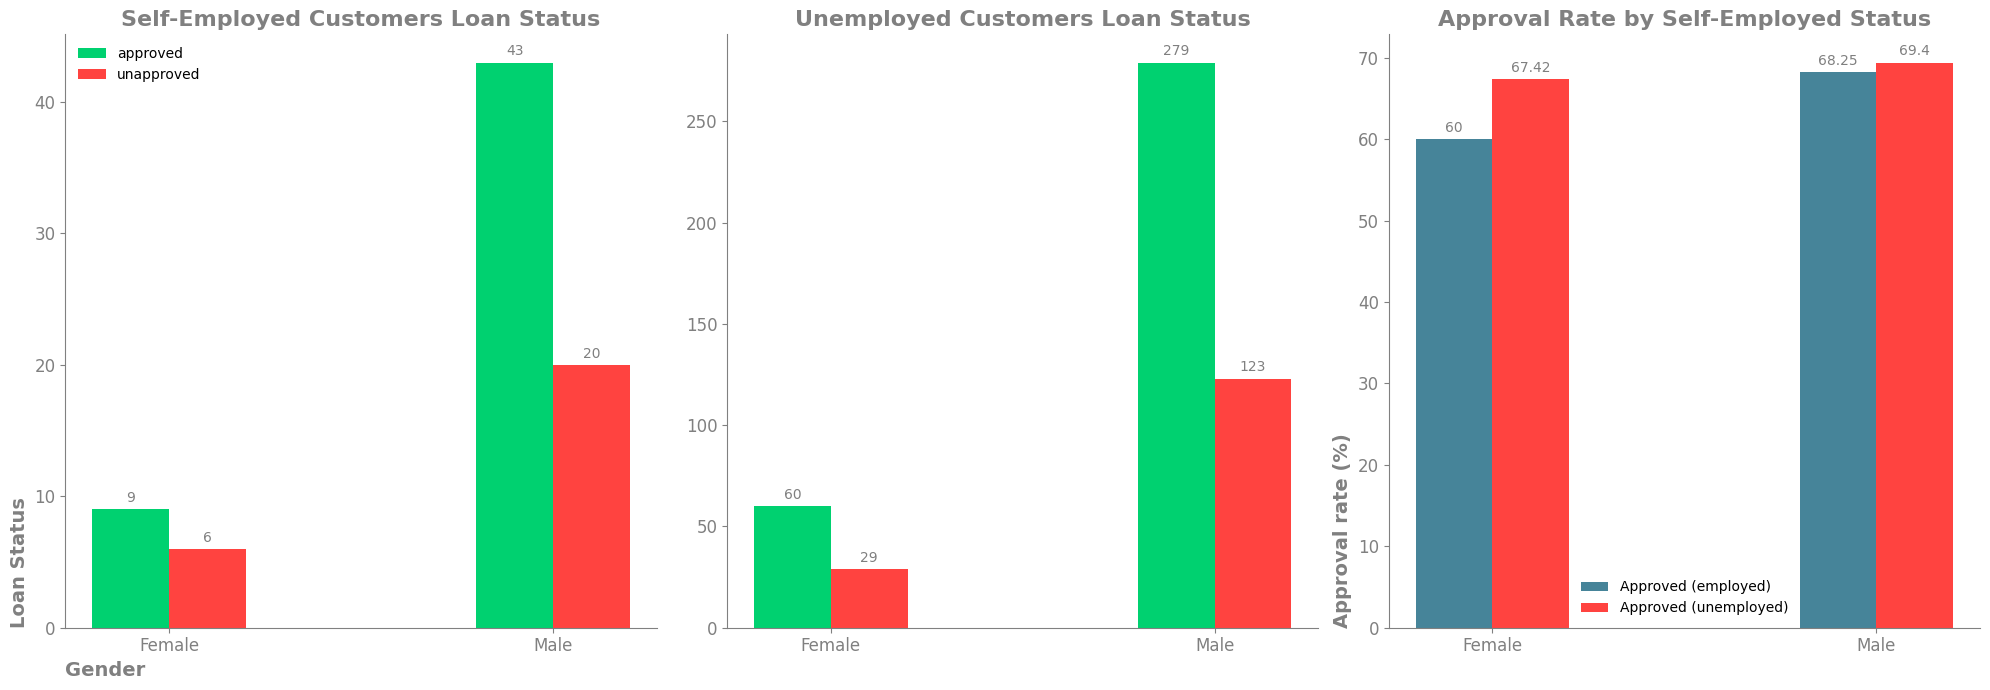

In [13]:
fig,ax = plt.subplots(1,3 ,figsize=(20,7))

x = np.arange(len(employed_status["Gender"]))
Approved_bars = ax[0].bar(
    data = employed_status , 
    x = x- 0.1 ,
    height = employed_status["Approved"] ,
    width = 0.2 ,
    color = "#00D170" , 
    label = "approved"
)

Uanpproved_bars = ax[0].bar(
    data = employed_status , 
    x = x + 0.1 ,
    height = employed_status["Unapproved"] ,
    width = 0.2 ,
     color = "#FF4340" ,
     label = "unapproved"
)

ax[0].spines[["right" , "top"]].set_visible(False)
ax[0].spines[["left" , "bottom"]].set_color('gray')  

ax[0].set_xticks( x , [ "Female" , "Male" ])

ax[0].bar_label(Approved_bars , padding= 3 , alpha = 0.5)
ax[0].bar_label(Uanpproved_bars , padding= 3 , alpha = 0.5)

ax[0].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[0].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[0].set_title("Self-Employed Customers Loan Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)
ax[0].set_xlabel(
    "Gender",
    loc="left",
    weight="bold",
    fontsize=14,
    color="gray",
)
ax[0].set_ylabel(
    "Loan Status",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="gray",
)

##for unemployed
x = np.arange(len(unemployed_status["Gender"]))
Approved_bars = ax[1].bar(
    data = unemployed_status , 
    x = x- 0.1 ,
    height = unemployed_status["Approved"] ,
    width = 0.2 ,
    color = "#00D170" , 
    label = "'Approved'"
)

Uanpproved_bars = ax[1].bar(
    data = unemployed_status , 
    x = x + 0.1 ,
    height = unemployed_status["Unapproved"] ,
    width = 0.2 ,
     color = "#FF4340" ,
     label = "'Unapproved'"
)

ax[1].spines[["right" , "top"]].set_visible(False)
ax[1].spines[["left" , "bottom"]].set_color('gray')  

ax[1].set_xticks( x , [ "Female" , "Male" ])

ax[1].bar_label(Approved_bars , padding= 3 , alpha = 0.5)
ax[1].bar_label(Uanpproved_bars , padding= 3 , alpha = 0.5)

ax[1].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[1].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[1].set_title("Unemployed Customers Loan Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)

##for approval rate

x = np.arange(len(total_approved_status_e["Gender"]))
Approved_bars = ax[2].bar(
    data = total_approved_status_e , 
    x = x- 0.1 ,
    height = total_approved_status_e["Approved_rate_employed"] ,
    width = 0.2 ,
    color = "#468499" , 
    label = "Approved (employed)"
)

Uanpproved_bars = ax[2].bar(
    data = total_approved_status_e , 
    x = x + 0.1 ,
    height = total_approved_status_e["Approved_rate_unemployed"] ,
    width = 0.2 ,
     color = "#FF4340" ,
     label = "Approved (unemployed)"
)

ax[2].spines[["right" , "top"]].set_visible(False)
ax[2].spines[["left" , "bottom"]].set_color('gray')  

ax[2].set_xticks( x , [ "Female" , "Male" ])

ax[2].bar_label(Approved_bars , padding= 3 , alpha = 0.5)
ax[2].bar_label(Uanpproved_bars , padding= 3 , alpha = 0.5)

ax[2].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[2].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[2].set_title("Approval Rate by Self-Employed Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)

ax[2].set_ylabel(
    "Approval rate (%)",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="gray",
)

ax[0].legend(frameon=False, loc='best')

ax[2].legend(frameon=False, loc="upper right", title="Approval Rate")



plt.legend(frameon = False)
plt.tight_layout()
plt.show()

## Analysis by Property Area Status ##


In [14]:
property_status = ( loan_dataframe

    .groupby(["Gender", "Loan_Status" , "Property_Area"] , as_index = False)
    .agg(
        total_property_status = ("Loan_Status" , "count"))
    .pivot_table(index = "Gender" , columns = ["Loan_Status" , "Property_Area"] , values = "total_property_status")
    .reset_index()
    .dropna()
    .rename(columns = { "N" : "Unapproved" ,"Y" : "Approved"} )
    .rename_axis(["Status", "Area"], axis=1)
)

property_status

Status  Gender Unapproved                 Approved                 
Area                Rural Semiurban Urban    Rural Semiurban  Urban
0       Female       10.0      13.0  14.0     14.0      42.0   19.0
1         Male       57.0      39.0  54.0     94.0     133.0  112.0

## Approval Rate for Each Area ##

In [15]:
for area in ["Rural" , "Semiurban" , "Urban"] :
    property_status[f"Approval_rate_{area}"] = (
        property_status[("Approved" , area)] / (property_status[("Approved" , area)] + property_status[("Unapproved" , area)])*100).round(2)
    

property_status

Status  Gender Unapproved                 Approved                   \
Area                Rural Semiurban Urban    Rural Semiurban  Urban   
0       Female       10.0      13.0  14.0     14.0      42.0   19.0   
1         Male       57.0      39.0  54.0     94.0     133.0  112.0   

Status Approval_rate_Rural Approval_rate_Semiurban Approval_rate_Urban  
Area                                                                    
0                    58.33                   76.36               57.58  
1                    62.25                   77.33               67.47

C:\Users\alire\AppData\Local\Temp\ipykernel_28372\877506996.py:175: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon = False)


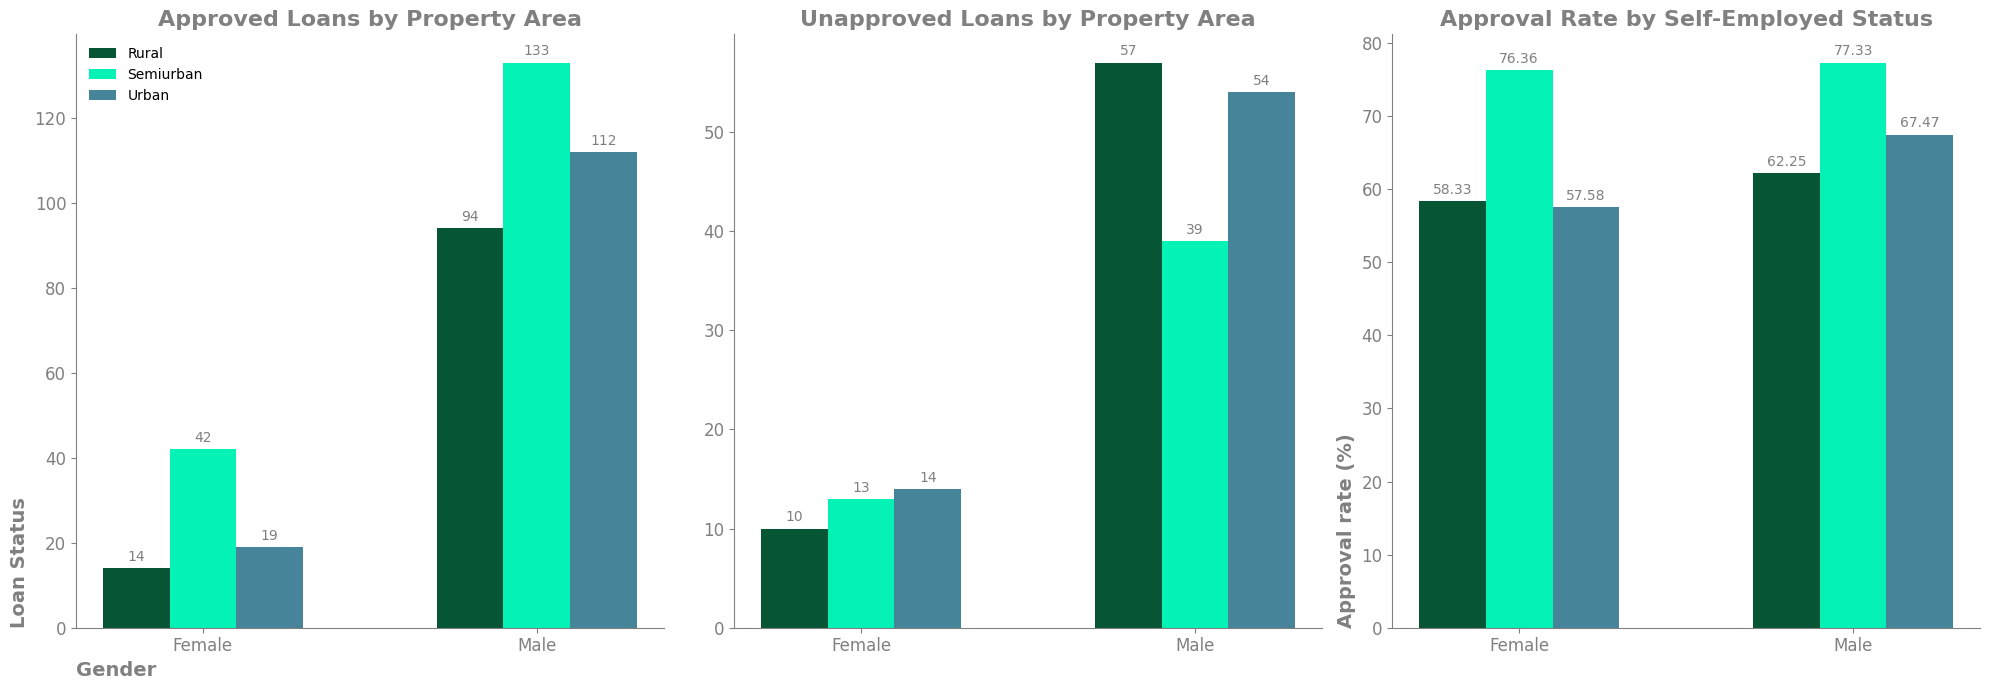

In [16]:
fig,ax = plt.subplots(1,3 ,figsize=(20,7))

x = np.arange(len(property_status["Gender"]))

Rural_bars = ax[0].bar(
    data = property_status , 
    x = x- 0.2 ,
    height = property_status[( "Approved" , "Rural")] ,
    width = 0.2 ,
    color = "#065535" , 
    label = "Rural"
)

Semiurban_bars = ax[0].bar(
    data = property_status , 
    x = x ,
    height = property_status[("Approved"  , "Semiurban")] ,
    width = 0.2 ,
     color = "#05F2B7" ,
     label = "Semiurban"
)
Urban_bars = ax[0].bar(
    data = property_status , 
    x = x + 0.2 ,
    height = property_status[( "Approved" , "Urban")] ,
    width = 0.2 ,
     color = "#468499" ,
     label = "Urban"
)

ax[0].spines[["right" , "top"]].set_visible(False)
ax[0].spines[["left" , "bottom"]].set_color('gray')  

ax[0].set_xticks( x , [ "Female" , "Male" ])

ax[0].bar_label(Rural_bars , padding= 3 , alpha = 0.5)
ax[0].bar_label(Semiurban_bars , padding= 3 , alpha = 0.5)
ax[0].bar_label(Urban_bars , padding= 3 , alpha = 0.5)

ax[0].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[0].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[0].set_title("Approved Loans by Property Area" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)
ax[0].set_xlabel(
    "Gender",
    loc="left",
    weight="bold",
    fontsize=14,
    color="gray",
)
ax[0].set_ylabel(
    "Loan Status",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="gray",
)

##for unemployed
x = np.arange(len(property_status["Gender"]))

Rural_bars = ax[1].bar(
    data = property_status , 
    x = x- 0.2 ,
    height = property_status[( "Unapproved" , "Rural")] ,
    width = 0.2 ,
    color = "#065535" , 
    label = "Rural"
)

Semiurban_bars = ax[1].bar(
    data = property_status , 
    x = x ,
    height = property_status[("Unapproved" , "Semiurban")] ,
    width = 0.2 ,
     color = "#05F2B7" ,
     label = "Semiurban"
)
Urban_bars = ax[1].bar(
    data = property_status , 
    x = x + 0.2 ,
    height = property_status[( "Unapproved", "Urban")] ,
    width = 0.2 ,
     color = "#468499" ,
     label = "Urban"
)

ax[1].spines[["right" , "top"]].set_visible(False)
ax[1].spines[["left" , "bottom"]].set_color('gray')  

ax[1].set_xticks( x , [ "Female" , "Male" ])

ax[1].bar_label(Rural_bars , padding= 3 , alpha = 0.5)
ax[1].bar_label(Semiurban_bars , padding= 3 , alpha = 0.5)
ax[1].bar_label(Urban_bars , padding= 3 , alpha = 0.5)

ax[1].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[1].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[1].set_title("Unapproved Loans by Property Area" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)

##for approval rate

x = np.arange(len(property_status["Gender"]))

Rural_bars = ax[2].bar(
    data = property_status , 
    x = x- 0.2 ,
    height = property_status["Approval_rate_Rural"] ,
    width = 0.2 ,
    color = "#065535" 
)

Semiurban_bars = ax[2].bar(
    data = property_status , 
    x = x ,
    height = property_status["Approval_rate_Semiurban"] ,
    width = 0.2 ,
     color = "#05F2B7" 
)
Urban_bars = ax[2].bar(
    data = property_status , 
    x = x + 0.2 ,
    height = property_status["Approval_rate_Urban"] ,
    width = 0.2 ,
     color = "#468499" 
)

ax[2].spines[["right" , "top"]].set_visible(False)
ax[2].spines[["left" , "bottom"]].set_color('gray')  

ax[2].set_xticks( x , [ "Female" , "Male" ])

ax[2].bar_label(Rural_bars , padding= 3 , alpha = 0.5)
ax[2].bar_label(Semiurban_bars , padding= 3 , alpha = 0.5)
ax[2].bar_label(Urban_bars , padding= 3 , alpha = 0.5)

ax[2].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[2].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[2].set_title("Approval Rate by Self-Employed Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)

ax[2].set_ylabel(
    "Approval rate (%)",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="gray",
)

ax[0].legend(frameon=False, loc='best')





plt.legend(frameon = False)
plt.tight_layout()
plt.show()

## Analysis by Dependents Status ##


In [17]:
dependents_status = ( loan_dataframe
    .groupby(["Gender", "Loan_Status" , "Dependents"] , as_index = False)
    .agg(
        total_dependents_status = ("Loan_Status" , "count"))
    .pivot_table(index = "Gender" , columns = ["Loan_Status" , "Dependents"] , values = "total_dependents_status")
    .reset_index()
    .dropna()
    .rename(columns = { "N" : "Unapproved" ,"Y" : "Approved"} )
    .rename_axis(["Status", "dependents"], axis=1)
)
dependents_status

Status      Gender Unapproved                   Approved                  
dependents                  0     1     2    3+        0     1     2    3+
0           Female       26.0   6.0   2.0   2.0     54.0  13.0   5.0   1.0
1             Male       78.0  30.0  21.0  16.0    180.0  52.0  71.0  29.0

## Approval Rate for Each Dependents ##

In [18]:
for dep in ["0" , "1" , "2" , "3+"] :
   dependents_status[f"Approval_rate_{dep}"] = (
   dependents_status[("Approved" , dep)] / (dependents_status[("Approved" , dep)] + dependents_status[("Unapproved" , dep)])*100).round(2)

dependents_status

Status      Gender Unapproved                   Approved                    \
dependents                  0     1     2    3+        0     1     2    3+   
0           Female       26.0   6.0   2.0   2.0     54.0  13.0   5.0   1.0   
1             Male       78.0  30.0  21.0  16.0    180.0  52.0  71.0  29.0   

Status     Approval_rate_0 Approval_rate_1 Approval_rate_2 Approval_rate_3+  
dependents                                                                   
0                    67.50           68.42           71.43            33.33  
1                    69.77           63.41           77.17            64.44

C:\Users\alire\AppData\Local\Temp\ipykernel_28372\1171140228.py:202: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon = False)


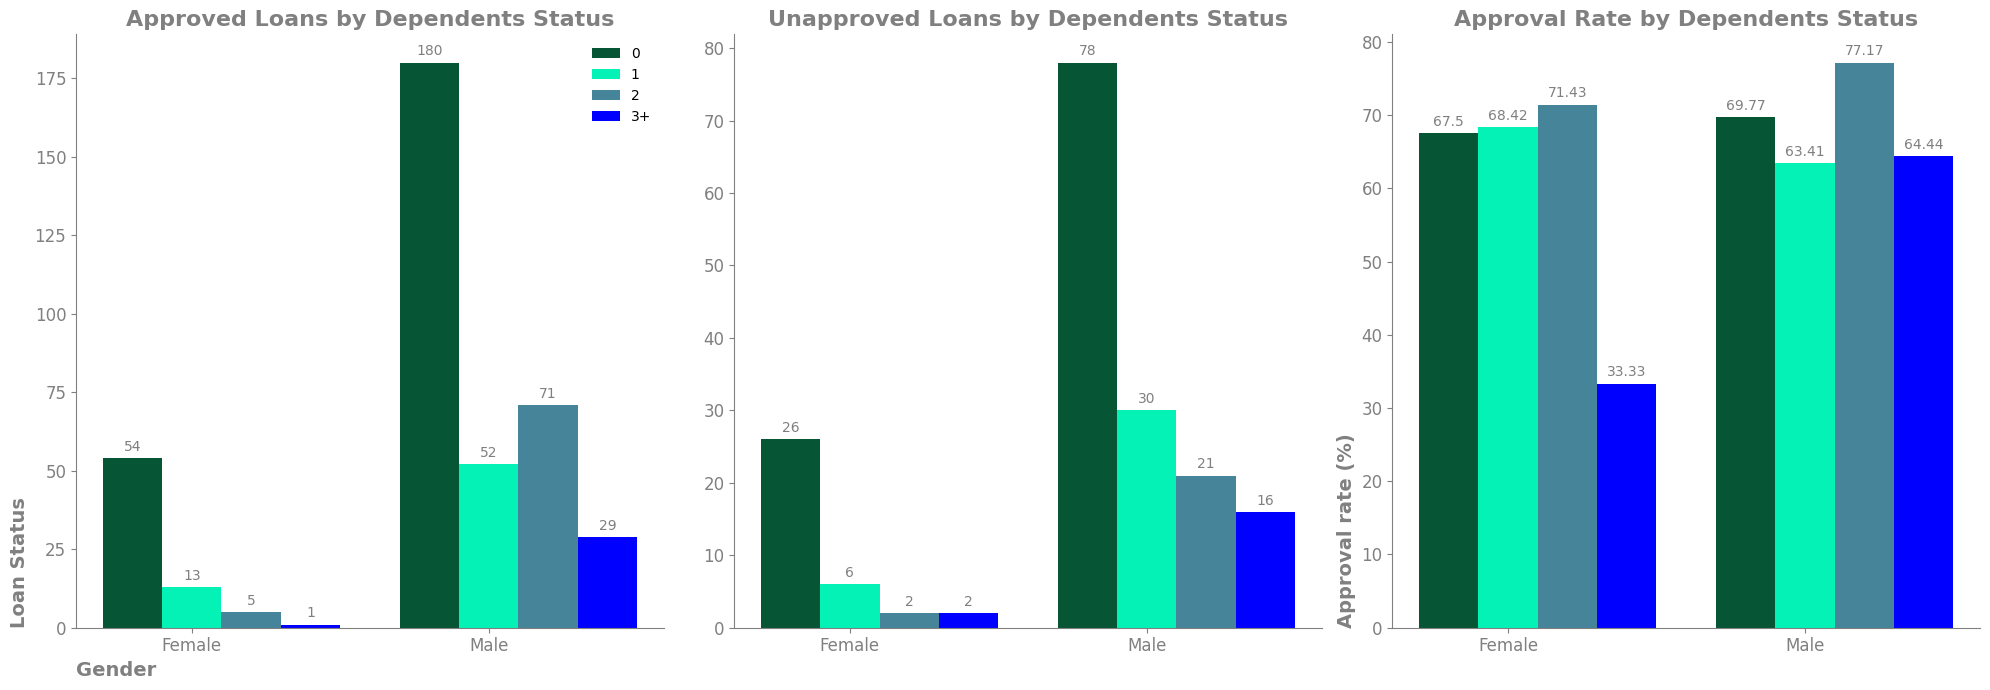

In [19]:
fig,ax = plt.subplots(1,3 ,figsize=(20,7))

x = np.arange(len(dependents_status["Gender"]))

zero_bars = ax[0].bar(
    data = dependents_status , 
    x = x- 0.2 ,
    height = dependents_status[( "Approved" , "0")] ,
    width = 0.2 ,
    color = "#065535" , 
    label = "0"
)

one_bars = ax[0].bar(
    data = dependents_status , 
    x = x ,
    height = dependents_status[("Approved"  , "1")] ,
    width = 0.2 ,
     color = "#05F2B7" ,
     label = "1"
)
two_bars = ax[0].bar(
    data = dependents_status , 
    x = x + 0.2 ,
    height = dependents_status[( "Approved" , "2")] ,
    width = 0.2 ,
     color = "#468499" ,
     label = "2"
)
more_3_bars = ax[0].bar(
    data = dependents_status , 
    x = x + 0.4 ,
    height = dependents_status[( "Approved" , "3+")] ,
    width = 0.2 ,
     color = "#0000ff" ,
     label = "3+"
)

ax[0].spines[["right" , "top"]].set_visible(False)
ax[0].spines[["left" , "bottom"]].set_color('gray')  

ax[0].set_xticks( x , [ "Female" , "Male" ])

ax[0].bar_label(zero_bars , padding= 3 , alpha = 0.5)
ax[0].bar_label(one_bars , padding= 3 , alpha = 0.5)
ax[0].bar_label(two_bars , padding= 3 , alpha = 0.5)
ax[0].bar_label(more_3_bars , padding= 3 , alpha = 0.5)

ax[0].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[0].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[0].set_title("Approved Loans by Dependents Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)
ax[0].set_xlabel(
    "Gender",
    loc="left",
    weight="bold",
    fontsize=14,
    color="gray",
)
ax[0].set_ylabel(
    "Loan Status",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="gray",
)

##for unemployed
x = np.arange(len(dependents_status["Gender"]))

zero_bars = ax[1].bar(
    data = dependents_status , 
    x = x- 0.2 ,
    height = dependents_status[( "Unapproved" , "0")] ,
    width = 0.2 ,
    color = "#065535" , 
    label = "0"
)

one_bars = ax[1].bar(
    data = dependents_status , 
    x = x ,
    height = dependents_status[("Unapproved"  , "1")] ,
    width = 0.2 ,
     color = "#05F2B7" ,
     label = "1"
)
two_bars = ax[1].bar(
    data = dependents_status , 
    x = x + 0.2 ,
    height = dependents_status[( "Unapproved" , "2")] ,
    width = 0.2 ,
     color = "#468499" ,
     label = "2"
)
more_3_bars = ax[1].bar(
    data = dependents_status , 
    x = x + 0.4 ,
    height = dependents_status[( "Unapproved" , "3+")] ,
    width = 0.2 ,
     color = "#0000ff" ,
     label = "3+"
)

ax[1].spines[["right" , "top"]].set_visible(False)
ax[1].spines[["left" , "bottom"]].set_color('gray')  

ax[1].set_xticks( x , [ "Female" , "Male" ])

ax[1].bar_label(zero_bars , padding= 3 , alpha = 0.5)
ax[1].bar_label(one_bars , padding= 3 , alpha = 0.5)
ax[1].bar_label(two_bars , padding= 3 , alpha = 0.5)
ax[1].bar_label(more_3_bars , padding= 3 , alpha = 0.5)


ax[1].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[1].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[1].set_title("Unapproved Loans by Dependents Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)

##for approval rate

x = np.arange(len(dependents_status["Gender"]))

zero_bars = ax[2].bar(
    data = dependents_status , 
    x = x- 0.2 ,
    height = dependents_status[ "Approval_rate_0"] ,
    width = 0.2 ,
    color = "#065535" 
)
one_bars = ax[2].bar(
    data = dependents_status , 
    x = x ,
    height = dependents_status["Approval_rate_1" ] ,
    width = 0.2 ,
     color = "#05F2B7" 
)
two_bars = ax[2].bar(
    data = dependents_status , 
    x = x + 0.2 ,
    height = dependents_status["Approval_rate_2"] ,
    width = 0.2 ,
     color = "#468499" 
)
more_3_bars = ax[2].bar(
    data = dependents_status , 
    x = x + 0.4 ,
    height = dependents_status[ "Approval_rate_3+"] ,
    width = 0.2 ,
     color = "#0000ff" 
)

ax[2].spines[["right" , "top"]].set_visible(False)
ax[2].spines[["left" , "bottom"]].set_color('gray')  

ax[2].set_xticks( x , [ "Female" , "Male" ])

ax[2].bar_label(zero_bars , padding= 3 , alpha = 0.5)
ax[2].bar_label(one_bars , padding= 3 , alpha = 0.5)
ax[2].bar_label(two_bars , padding= 3 , alpha = 0.5)
ax[2].bar_label(more_3_bars , padding= 3 , alpha = 0.5)


ax[2].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[2].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[2].set_title("Approval Rate by Dependents Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)

ax[2].set_ylabel(
    "Approval rate (%)",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="gray",
)

ax[0].legend(frameon=False, loc='best')





plt.legend(frameon = False)
plt.tight_layout()
plt.show()

## Analysis by Credit Status ##


In [20]:

credit_status = ( loan_dataframe
    .groupby(["Gender", "Loan_Status" , "Credit_History"] , as_index = False)
    .agg(
        total_credit_status = ("Loan_Status" , "count"))
    .pivot_table(index = "Gender" , columns = ["Loan_Status" , "Credit_History"] , values = "total_credit_status")
    .reset_index()
    .dropna()
    .rename(columns = { "N" : "Unapproved" ,"Y" : "Approved"} )
    .rename_axis(["Status", "credit history"], axis=1)
)
credit_status

Status          Gender Unapproved       Approved       
credit history                0.0   1.0      0.0    1.0
0               Female       16.0  20.0      1.0   64.0
1                 Male       63.0  75.0      6.0  307.0

In [21]:
cr_values = credit_status["Approved"].columns
for cr in cr_values:
   credit_status[f"Approval_rate_{cr}"] = (
   credit_status[("Approved" , cr)] / (credit_status[("Approved" , cr)] + credit_status[("Unapproved" , cr)])*100).round(2)

credit_status

Status          Gender Unapproved       Approved        Approval_rate_0.0  \
credit history                0.0   1.0      0.0    1.0                     
0               Female       16.0  20.0      1.0   64.0              5.88   
1                 Male       63.0  75.0      6.0  307.0              8.70   

Status         Approval_rate_1.0  
credit history                    
0                          76.19  
1                          80.37

C:\Users\alire\AppData\Local\Temp\ipykernel_28372\1851718540.py:162: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon = False)


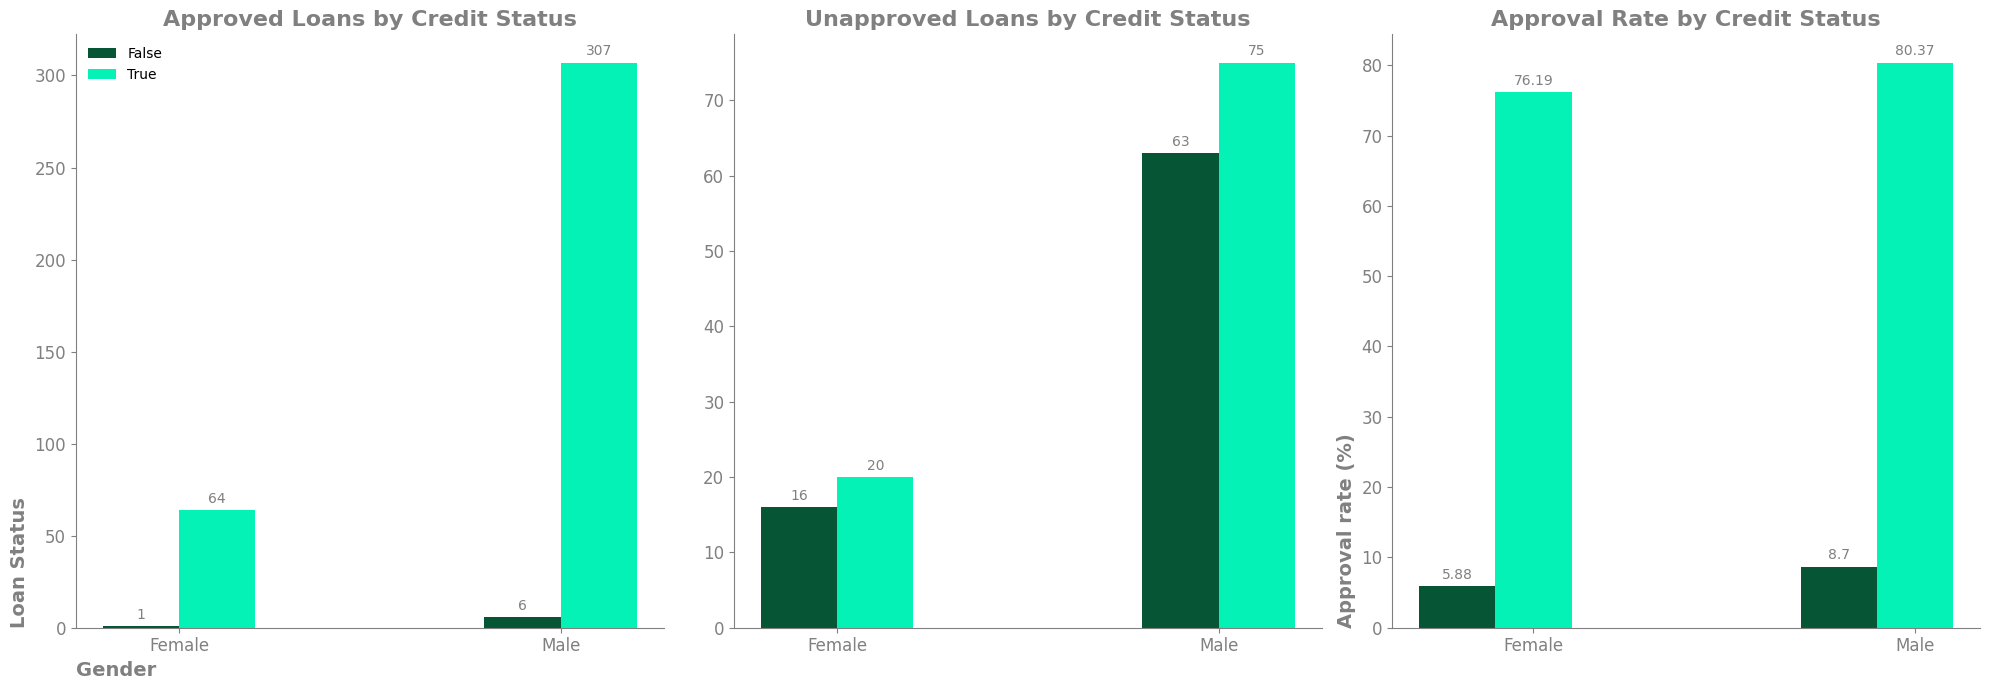

In [22]:
fig,ax = plt.subplots(1,3 ,figsize=(20,7))


cr_vals = list(credit_status["Approved"].columns)   
cr0, cr1 = cr_vals[0], cr_vals[1]



x = np.arange(len(credit_status["Gender"]))

false_bars = ax[0].bar(
    data = credit_status , 
    x = x- 0.1 ,
    height = credit_status[( "Approved" , cr0)] ,
    width = 0.2 ,
    color = "#065535" , 
    label = "False"
)

true_bars = ax[0].bar(
    data = credit_status , 
    x = x + 0.1 ,
    height = credit_status[("Approved"  , cr1)] ,
    width = 0.2 ,
     color = "#05F2B7" ,
     label = "True"
)

ax[0].bar_label(false_bars , padding= 3 , alpha = 0.5)
ax[0].bar_label(true_bars , padding= 3 , alpha = 0.5)

ax[0].spines[["right" , "top"]].set_visible(False)
ax[0].spines[["left" , "bottom"]].set_color('gray')  

ax[0].set_xticks( x , [ "Female" , "Male" ])




ax[0].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[0].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[0].set_title("Approved Loans by Credit Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)
ax[0].set_xlabel(
    "Gender",
    loc="left",
    weight="bold",
    fontsize=14,
    color="gray",
)
ax[0].set_ylabel(
    "Loan Status",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="gray",
)

##for unemployed
x = np.arange(len(credit_status["Gender"]))

false_bars = ax[1].bar(
    data = credit_status , 
    x = x- 0.1 ,
    height = credit_status[( "Unapproved" , cr0)] ,
    width = 0.2 ,
    color = "#065535" , 
    label = "False"
)

true_bars = ax[1].bar(
    data = credit_status , 
    x = x + 0.1 ,
    height = credit_status[("Unapproved"  , cr1)] ,
    width = 0.2 ,
     color = "#05F2B7" ,
     label = "True"
)

ax[1].bar_label(false_bars , padding= 3 , alpha = 0.5)
ax[1].bar_label(true_bars , padding= 3 , alpha = 0.5)

ax[1].spines[["right" , "top"]].set_visible(False)
ax[1].spines[["left" , "bottom"]].set_color('gray')  

ax[1].set_xticks( x , [ "Female" , "Male" ])



ax[1].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[1].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[1].set_title("Unapproved Loans by Credit Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)

##for approval rate

x = np.arange(len(credit_status["Gender"]))

false_bars = ax[2].bar(
    data = credit_status , 
    x = x- 0.2 ,
    height = credit_status[f"Approval_rate_{cr0}"] ,
    width = 0.2 ,
    color = "#065535" 
)

true_bars = ax[2].bar(
    data = credit_status , 
    x = x ,
    height = credit_status[f"Approval_rate_{cr1}"] ,
    width = 0.2 ,
     color = "#05F2B7" 
)

ax[2].bar_label(false_bars , padding= 3 , alpha = 0.5)
ax[2].bar_label(true_bars , padding= 3 , alpha = 0.5)

ax[2].spines[["right" , "top"]].set_visible(False)
ax[2].spines[["left" , "bottom"]].set_color('gray')  

ax[2].set_xticks( x , [ "Female" , "Male" ])



ax[2].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[2].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[2].set_title("Approval Rate by Credit Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)

ax[2].set_ylabel(
    "Approval rate (%)",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="gray",
)

ax[0].legend(frameon=False, loc='best')





plt.legend(frameon = False)
plt.tight_layout()
plt.show()

In [23]:
loan_dataframe

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Analysis Numerical Datas ##

In [24]:
def numerical_datas_fig(df, col ):

    
    approved = df.loc[df["Loan_Status"] == "Y",  [col, "Gender"]].dropna()
    unapproved = df.loc[df["Loan_Status"] == "N" , [col, "Gender"]].dropna()

    print(f"{col} ")
    print("Approved Stats:")
    print(approved.describe())
    print("\nUnapproved Stats:")
    print(unapproved.describe())

    fig, ax = plt.subplots(1, 2, figsize=(16, 7))

    sns.histplot(
        data=approved,
        x=col,
        bins=30,
        kde=True,
        color="#468499",
        edgecolor="gray",
        hue = "Gender",
        multiple="stack",
        ax=ax[0]
        
    )
    ax[0].spines[["right", "top"]].set_visible(False)
    ax[0].spines[["left", "bottom"]].set_color("gray")
    
    ax[0].tick_params(axis="x", colors="gray", labelsize="large")
    ax[0].tick_params(axis="y", colors="gray", labelsize="large")
    
    ax[0].set_title(f"Approved Loans by {col} Status",
                    fontsize=18, color="gray")
    ax[0].set_xlabel(f"{col}", color="gray",
                     weight="bold", fontsize=14, loc="left")
    ax[0].set_ylabel("Loan Status", color="gray",
                     weight="bold", fontsize=14, loc="bottom")

    ax[0].grid(axis="x", linestyle="")
    ax[0].grid(axis="y", linestyle="dotted", linewidth=1)


    sns.histplot(
        data=unapproved,
        x=col,
        bins=30,
        kde=True,
        color="#468499",
        edgecolor="gray",
        hue = "Gender",
        multiple="stack",
        ax=ax[1]
    )
    ax[1].spines[["right", "top"]].set_visible(False)
    ax[1].spines[["left", "bottom"]].set_color("gray")
    
    ax[1].tick_params(axis="x", colors="gray", labelsize="large")
    ax[1].tick_params(axis="y", colors="gray", labelsize="large")
    
    ax[1].set_title(f"Unaprroved Loans by {col} Status",
                    fontsize=18, color="gray")
    ax[1].grid(axis="x", linestyle="")
    ax[1].grid(axis="y", linestyle="dotted", linewidth=1)

    ax[1].set_xlabel("")
    ax[1].set_ylabel("")


    plt.show()

                   



ApplicantIncome 
Approved Stats:
       ApplicantIncome
count       414.000000
mean       5200.777778
std        5229.149134
min         210.000000
25%        2877.500000
50%        3768.500000
75%        5703.000000
max       63337.000000

Unapproved Stats:
       ApplicantIncome
count       187.000000
mean       5509.443850
std        6899.096221
min         150.000000
25%        2903.000000
50%        3948.000000
75%        6000.000000
max       81000.000000


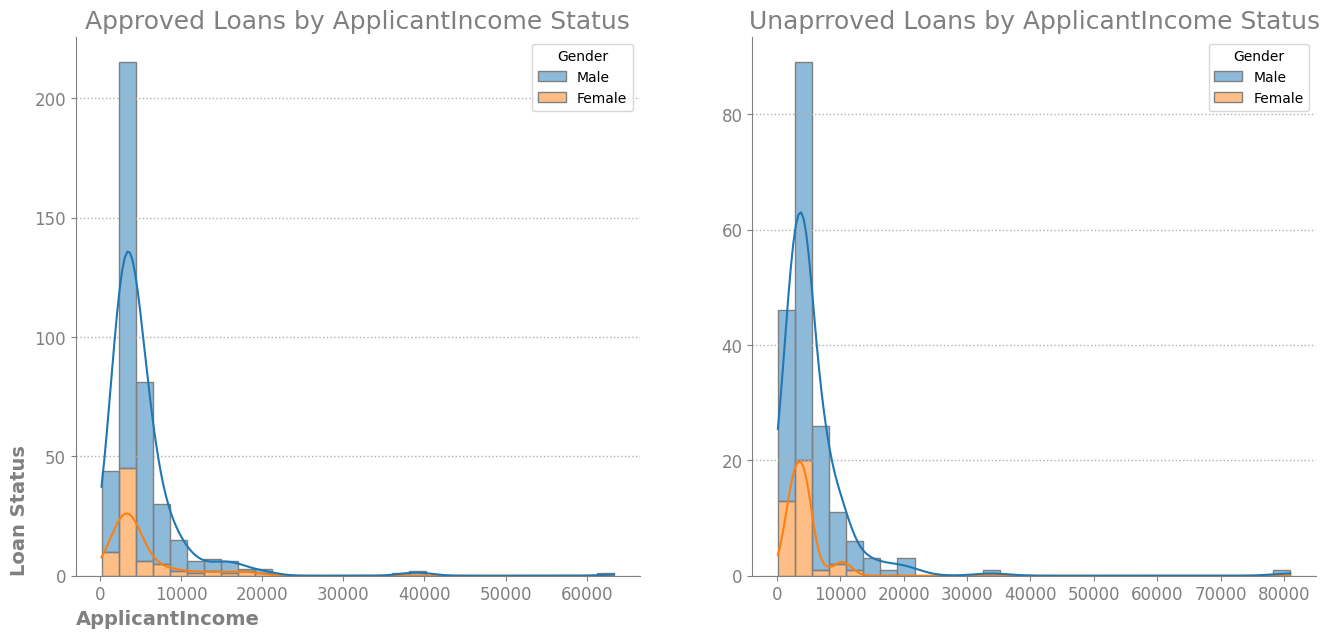

CoapplicantIncome 
Approved Stats:
       CoapplicantIncome
count         414.000000
mean         1506.507053
std          1922.984144
min             0.000000
25%             0.000000
50%          1255.000000
75%          2297.250000
max         20000.000000

Unapproved Stats:
       CoapplicantIncome
count         187.000000
mean         1886.080214
std          4440.384475
min             0.000000
25%             0.000000
50%             0.000000
75%          2379.500000
max         41667.000000


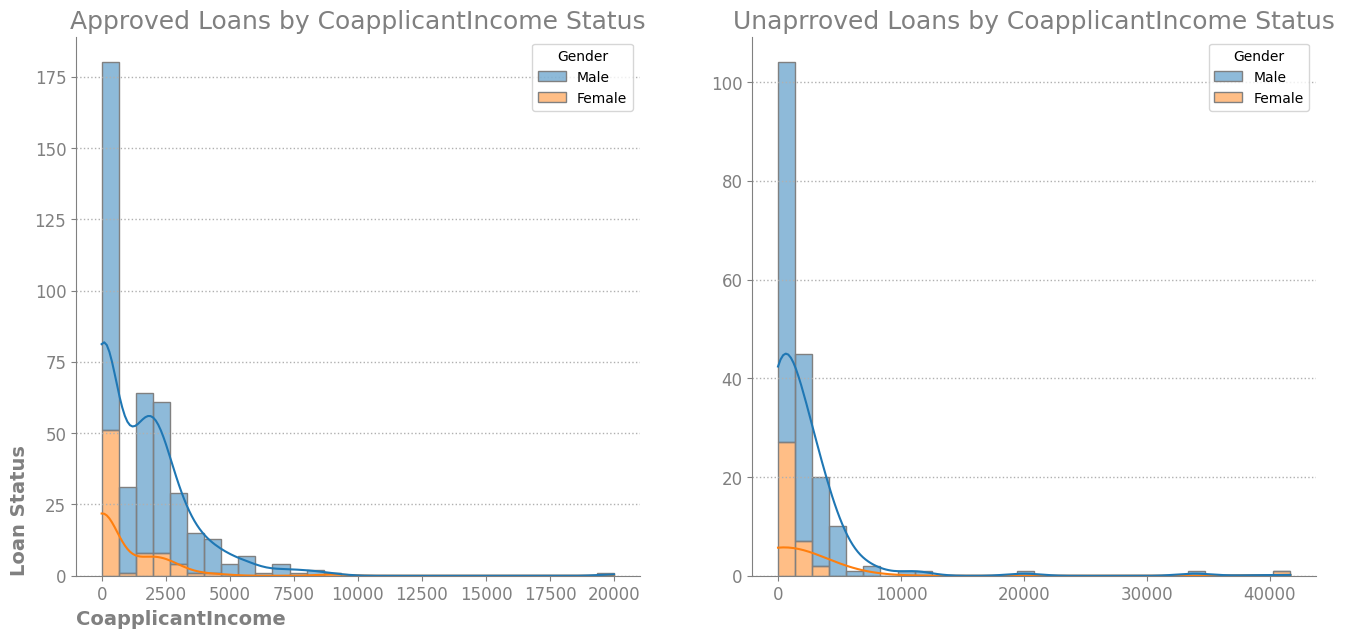

LoanAmount 
Approved Stats:
       LoanAmount
count  403.000000
mean   142.007444
std     80.522408
min     17.000000
25%    100.000000
50%    125.000000
75%    160.000000
max    650.000000

Unapproved Stats:
       LoanAmount
count  176.000000
mean   151.909091
std     86.905615
min      9.000000
25%    100.000000
50%    128.500000
75%    178.500000
max    570.000000


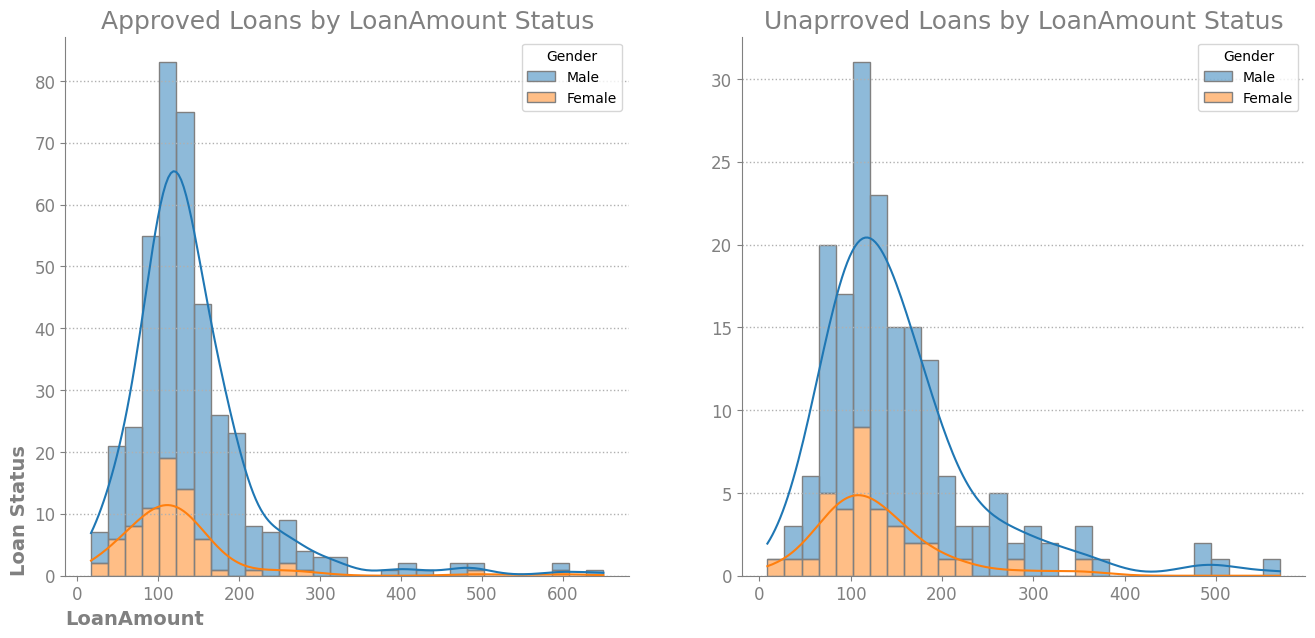

In [25]:
for col in ["ApplicantIncome", "CoapplicantIncome", "LoanAmount" ]:
    numerical_datas_fig(loan_dataframe, col )

In [26]:
loan_dataframe


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Analysis by Loan Term Status ##


In [27]:


loan_amount_status = ( loan_dataframe
    
    .query("Loan_Amount_Term > 0" )
    .groupby(["Gender", "Loan_Status" , "Loan_Amount_Term"] , as_index = False)
    .agg(
        total_term_status = ("Loan_Status" , "count"))
    .pivot_table(index = "Gender" , columns = ["Loan_Status" , "Loan_Amount_Term"] , values = "total_term_status" , fill_value = 0)
    .reset_index()
    .rename(columns = { "N" : "Unapproved" ,"Y" : "Approved"} )
    .rename_axis(["Status", "Amount Term"], axis=1)
    
)

loan_amount_status


Status       Gender Unapproved                                     Approved  \
Amount Term               36.0 84.0 180.0 240.0 300.0  360.0 480.0     12.0   
0            Female        1.0  0.0   1.0   0.0   1.0   31.0   2.0      0.0   
1              Male        1.0  1.0  14.0   1.0   4.0  117.0   7.0      1.0   

Status                                                      
Amount Term 60.0 84.0 120.0 180.0 240.0 300.0  360.0 480.0  
0            0.0  1.0   0.0   2.0   1.0   0.0   67.0   2.0  
1            2.0  2.0   3.0  26.0   2.0   7.0  286.0   4.0

In [28]:
loan_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


## Check Missing Values ##

In [29]:
missing_count = loan_dataframe.isnull().sum()
missing_percent = (missing_count / (len(loan_dataframe)))*100

missing_dataframe = pd.DataFrame(
    {
        "Missing Count" : missing_count ,
        "Missing Percent" : missing_percent
    }
).sort_values(by = "Missing Percent" , ascending = False)

missing_dataframe

,Missing Count,Missing Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Education,0,0.000000
CoapplicantIncome,0,0.000000
ApplicantIncome,0,0.000000


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

In [ ]:

df = loan_dataframe.copy()
y = df["Loan_Status"].map({"Y":1, "N":0}).astype(int)
X = df.drop(columns=["Loan_Status"])

if "Dependents" in X.columns :
    X["Dependents"] = (
        X["Dependents"].replace({"0" : 0 , "1" : 1 , "2" : 2 , "3+" : 3}).astype(float)
    )
if "Credit_History" in X.columns :
    X["Credit_History"] = (
        X["Credit_History"].replace({"0" : 0 , "1" : 1 }).astype(float)
    )

cat_columns = X.select_dtypes(include = ("object" , "category")).columns.tolist()
num_columns = X.select_dtypes(include = ("number")).columns.tolist()







C:\Users\alire\AppData\Local\Temp\ipykernel_28372\2176453702.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["Dependents"].replace({"0" : 0 , "1" : 1 , "2" : 2 , "3+" : 3}).astype(float)


In [138]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.15,
    random_state=40,
    stratify=y
)

validation_ratio = 0.20 / (1 - 0.15)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=validation_ratio,
    random_state=40,
    stratify=y_temp
)

print("Train:", len(y_train))
print("Validation:", len(y_val))
print("Test:", len(y_test))

Train: 398
Validation: 123
Test: 93


##  Sub Pipelines ##

In [117]:
cat_pipeline = Pipeline(steps = [
    ("impute_cat" , SimpleImputer(strategy= "constant" ,fill_value = "Unknown")),
    ("ohe" , OneHotEncoder (handle_unknown = "ignore" , sparse_output = False))
])

num_pipeline_normalized = Pipeline(steps=[
    ("impute", KNNImputer(n_neighbors = 5)) , 
    ("scale" , StandardScaler ())
])

num_pipeline_unnormalized = Pipeline(steps=[
    ("impute", KNNImputer(n_neighbors = 5)) , 
])


In [118]:
preprocessing_normalized = ColumnTransformer (transformers = [
    ("cat" , cat_pipeline , cat_columns),
    ("num" , num_pipeline_normalized , num_columns)

] , remainder = "drop")

preprocessing_unnormalized = ColumnTransformer (transformers = [
    ("cat" , cat_pipeline , cat_columns),
    ("num" , num_pipeline_unnormalized , num_columns)

] , remainder = "drop")
preprocessing_normalized

,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'constant'
,fill_value,'Unknown'


In [119]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

## LogisticRegression Model ##

In [139]:
pipe_lgr_norm = Pipeline(steps =[
    ("preprocessing" ,preprocessing_normalized ),
    ("LogisticRegression" , LogisticRegression(max_iter = 500 , class_weight = "balanced" , random_state = 42))
])

##for unnormalized num

pipe_lgr_unnorm = Pipeline(steps =[
    ("preprocessing" ,preprocessing_unnormalized ),
    ("LogisticRegression" , LogisticRegression(max_iter = 500 , class_weight = "balanced" , random_state = 42))
])

## GridSearchCV for LogisticRegression Model ##

In [146]:
param_grid_lgr = {
    "preprocessing__num__impute__n_neighbors" : range(1,10) ,

    "LogisticRegression__C" : [0.01 , 0.1 , 1 , 10] ,
    "LogisticRegression__solver" : ["liblinear" , "saga"]

}


gridcv_lgr_norm = GridSearchCV (
    estimator = pipe_lgr_norm ,
    param_grid = param_grid_lgr ,
    scoring = "roc_auc",
    cv = 5 , 
    n_jobs = -1
)

gridcv_lgr_unnorm = GridSearchCV (
    estimator = pipe_lgr_unnorm ,
    param_grid = param_grid_lgr ,
    scoring = "roc_auc",
    cv = 5 , 
    n_jobs = -1
)


gridcv_lgr_norm.fit(X_train , y_train)

gridcv_lgr_unnorm.fit(X_train , y_train)


print(f"Best hyper parameters normalized (LR) : {gridcv_lgr_norm.best_params_}")
print(f"\nBest Score (AUC) : {gridcv_lgr_norm.best_score_ :.2f}")

print(f"\nBest hyper parameters unnormalized (LR): {gridcv_lgr_unnorm.best_params_}")
print(f"\nBest Score (AUC) : {gridcv_lgr_unnorm.best_score_ :.2f}")

best_lgr_norm_model = gridcv_lgr_norm.best_estimator_
best_lgr_unnorm_model = gridcv_lgr_unnorm.best_estimator_

Best hyper parameters normalized (LR) : {'LogisticRegression__C': 0.01, 'LogisticRegression__solver': 'liblinear', 'preprocessing__num__impute__n_neighbors': 9}

Best Score (AUC) : 0.74

Best hyper parameters unnormalized (LR): {'LogisticRegression__C': 1, 'LogisticRegression__solver': 'liblinear', 'preprocessing__num__impute__n_neighbors': 9}

Best Score (AUC) : 0.73


## XGBoost Model ##

In [141]:
from xgboost import XGBClassifier


pipe_xgb_norm = Pipeline (steps= [
    ("preprocessing" ,preprocessing_normalized) ,
    ("classifier" , XGBClassifier(random_state = 42 , use_label_encoder=False, eval_metric='logloss'))
])

pipe_xgb_unnorm = Pipeline (steps= [
    ("preprocessing" ,preprocessing_unnormalized) ,
    ("classifier" , XGBClassifier(random_state = 42 , use_label_encoder=False, eval_metric='logloss'))
])

## GridSearchCV for XGB Model ##

In [147]:
param_grid_xgb = {
    "classifier__n_estimators" : [100 , 200 ,300] ,
    "classifier__max_depth" : [3 , 5 , 7] ,
    "classifier__learning_rate" : [0.05 , 0.1 , 0.2]
}

gridcv_xgb_norm = GridSearchCV (
    estimator = pipe_xgb_norm ,
    param_grid = param_grid_xgb ,
    scoring = "roc_auc",
    cv = 5 , 
    n_jobs = -1
)

gridcv_xgb_unnorm = GridSearchCV (
    estimator = pipe_xgb_unnorm ,
    param_grid = param_grid_xgb ,
    scoring = "roc_auc",
    cv = 5 , 
    n_jobs = -1
)

gridcv_xgb_norm.fit(X_train , y_train)

gridcv_xgb_unnorm.fit(X_train , y_train)

print(f"Best hyper parameters normalized (XGB) : {gridcv_xgb_norm.best_params_}")
print(f"\nBest Score (AUC) : {gridcv_xgb_norm.best_score_ :.2f}")

print(f"\nBest hyper parameters unnormalized (XGB) : {gridcv_xgb_unnorm.best_params_}")
print(f"\nBest Score (AUC) : {gridcv_xgb_unnorm.best_score_ :.2f}")

best_xgb_norm_model = gridcv_xgb_norm.best_estimator_
best_xgb_unnorm_model = gridcv_xgb_unnorm.best_estimator_


d:\Data Sience\Projects\Loan_PJ\loan_venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:10:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best hyper parameters normalized (XGB) : {'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 300}

Best Score (AUC) : 0.74

Best hyper parameters unnormalized (XGB) : {'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 300}

Best Score (AUC) : 0.74


d:\Data Sience\Projects\Loan_PJ\loan_venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:10:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Random Forest Model ##

In [148]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf_norm = Pipeline (steps= [
    ("preprocessing" ,preprocessing_normalized) ,
    ("classifier" ,  RandomForestClassifier(random_state = 42 , class_weight = "balanced"))
])

pipe_rf_unnorm = Pipeline (steps= [
    ("preprocessing" ,preprocessing_unnormalized) ,
    ("classifier" ,  RandomForestClassifier(random_state = 42 , class_weight = "balanced"))
])

## GridSearchCV for RF Model ##

In [149]:
param_grid_rf = {
    "classifier__n_estimators" : [100 , 200 ,300] ,
    "classifier__max_depth" : [3 , 5 , 7] ,
    "classifier__min_samples_split" : [2 , 5 , 10]
}

gridcv_rf_norm = GridSearchCV (
    estimator = pipe_rf_norm ,
    param_grid = param_grid_rf ,
    scoring = "roc_auc",
    cv = 5 , 
    n_jobs = -1
)

gridcv_rf_unnorm = GridSearchCV (
    estimator = pipe_rf_unnorm ,
    param_grid = param_grid_rf ,
    scoring = "roc_auc",
    cv = 5 , 
    n_jobs = -1
)

gridcv_rf_norm.fit(X_train , y_train)

gridcv_rf_unnorm.fit(X_train , y_train)

print(f"Best hyper parameters normalized (RF) : {gridcv_rf_norm.best_params_}")
print(f"\nBest Score (AUC) : {gridcv_rf_norm.best_score_ :.2f}")

print(f"\nBest hyper parameters unnormalized (RF) : {gridcv_rf_unnorm.best_params_}")
print(f"\nBest Score (AUC) : {gridcv_rf_unnorm.best_score_ :.2f}")

best_rf_norm_model = gridcv_rf_norm.best_estimator_
best_rf_unnorm_model = gridcv_rf_unnorm.best_estimator_


Best hyper parameters normalized (RF) : {'classifier__max_depth': 7, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}

Best Score (AUC) : 0.73

Best hyper parameters unnormalized (RF) : {'classifier__max_depth': 7, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}

Best Score (AUC) : 0.73


## KNN Model ##

In [150]:
from sklearn.neighbors import KNeighborsClassifier

pipe_knn_norm = Pipeline (steps= [
    ("preprocessing" ,preprocessing_normalized) ,
    ("classifier" ,  KNeighborsClassifier())
])

pipe_knn_unnorm = Pipeline (steps= [
    ("preprocessing" ,preprocessing_unnormalized) ,
    ("classifier" ,  KNeighborsClassifier())
])


## GridSearchCV for KNN Model ##

In [151]:
param_grid_knn = {
    "preprocessing__num__impute__n_neighbors" : [3,5,9] ,
     "classifier__n_neighbors" : range(1,20)

}

gridcv_knn_norm = GridSearchCV (
    estimator = pipe_knn_norm ,
    param_grid = param_grid_knn ,
    scoring = "roc_auc",
    cv = 5 , 
    n_jobs = -1
)

gridcv_knn_unnorm = GridSearchCV (
    estimator = pipe_knn_unnorm ,
    param_grid = param_grid_knn ,
    scoring = "roc_auc",
    cv = 5 , 
    n_jobs = -1
)

gridcv_knn_norm.fit(X_train , y_train)

gridcv_knn_unnorm.fit(X_train , y_train)

print(f"Best hyper parameters normalized (KNN) : {gridcv_knn_norm.best_params_}")
print(f"\nBest Score (AUC) : {gridcv_knn_norm.best_score_ :.2f}")

print(f"\nBest hyper parameters unnormalized (KNN) : {gridcv_knn_unnorm.best_params_}")
print(f"\nBest Score (AUC) : {gridcv_knn_unnorm.best_score_ :.2f}")

best_knn_norm_model = gridcv_knn_norm.best_estimator_
best_knn_unnorm_model = gridcv_knn_unnorm.best_estimator_

Best hyper parameters normalized (KNN) : {'classifier__n_neighbors': 19, 'preprocessing__num__impute__n_neighbors': 5}

Best Score (AUC) : 0.75

Best hyper parameters unnormalized (KNN) : {'classifier__n_neighbors': 10, 'preprocessing__num__impute__n_neighbors': 3}

Best Score (AUC) : 0.56


## ANN Model ##

In [130]:
from sklearn.neural_network import MLPClassifier

pipe_ann_norm = Pipeline (steps= [
    ("preprocessing" ,preprocessing_normalized) ,
    ("classifier" ,  MLPClassifier(max_iter = 1000 , random_state =42))
])

pipe_ann_unnorm = Pipeline (steps= [
    ("preprocessing" ,preprocessing_unnormalized) ,
    ("classifier" ,  MLPClassifier(max_iter = 1000 , random_state =42))
])


## GridSearchCV for ANN Model ##

In [152]:
param_grid_ann = {
     "classifier__hidden_layer_sizes" :  [(50,), (100,), (50, 50)],
     "classifier__activation" : ['relu', 'tanh'],
     "classifier__alpha" : [0.0001, 0.001, 0.01]

}

gridcv_ann_norm = GridSearchCV (
    estimator = pipe_ann_norm ,
    param_grid = param_grid_ann ,
    scoring = "roc_auc",
    cv = 5 , 
    n_jobs = -1
)

gridcv_ann_unnorm = GridSearchCV (
    estimator = pipe_ann_unnorm ,
    param_grid = param_grid_ann ,
    scoring = "roc_auc",
    cv = 5 , 
    n_jobs = -1
)

gridcv_ann_norm.fit(X_train , y_train)

gridcv_ann_unnorm.fit(X_train , y_train)

print(f"Best hyper parameters normalized (ANN) : {gridcv_ann_norm.best_params_}")
print(f"\nBest Score (AUC) : {gridcv_ann_norm.best_score_ :.2f}")

print(f"\nBest hyper parameters unnormalized (ANN) : {gridcv_ann_unnorm.best_params_}")
print(f"\nBest Score (AUC) : {gridcv_ann_unnorm.best_score_ :.2f}")

best_ann_norm_model = gridcv_ann_norm.best_estimator_
best_ann_unnorm_model = gridcv_ann_unnorm.best_estimator_

d:\Data Sience\Projects\Loan_PJ\loan_venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best hyper parameters normalized (ANN) : {'classifier__activation': 'tanh', 'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (50,)}

Best Score (AUC) : 0.68

Best hyper parameters unnormalized (ANN) : {'classifier__activation': 'tanh', 'classifier__alpha': 0.001, 'classifier__hidden_layer_sizes': (100,)}

Best Score (AUC) : 0.59


# Testing Part ##

In [153]:
from sklearn.metrics import classification_report, confusion_matrix


### LogisticRegression ###

Final Report for LogisticRegression
                precision    recall  f1-score   support

(0) Unapproved       0.85      0.38      0.52        29
  (1) Approved       0.78      0.97      0.86        64

      accuracy                           0.78        93
     macro avg       0.81      0.67      0.69        93
  weighted avg       0.80      0.78      0.76        93

Final AUC for Test Data : 72.90


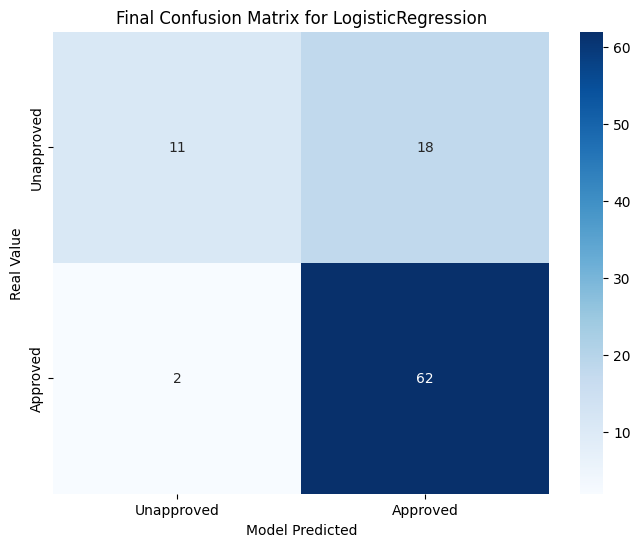

In [154]:


best_lgr_norm_model = gridcv_lgr_norm.best_estimator_
best_lgr_unnorm_model = gridcv_lgr_unnorm.best_estimator_


y_predict_norm = best_lgr_norm_model.predict(X_test)
y_predict_unnorm = best_lgr_unnorm_model.predict(X_test)

y_predict_proba_test = best_lgr_norm_model.predict_proba(X_test)[:, 1]

print("Final Report for LogisticRegression")

print(classification_report(y_test , y_predict_norm , target_names=["(0) Unapproved" , "(1) Approved"]))

##AUC Score

auc = roc_auc_score(y_test, y_predict_proba_test)*100
print(f"Final AUC for Test Data : {auc:.2f}")

##Confusion Matrix for normalized data

confusion_lgr = confusion_matrix(y_test , y_predict_norm)
fig,ax = plt.subplots(figsize=(8,6))

sns.heatmap(
    confusion_lgr,
    annot=True, fmt='d', 
    cmap='Blues',
    xticklabels=["Unapproved" , "Approved"],
    yticklabels=["Unapproved" , "Approved"])

plt.xlabel("Model Predicted")
plt.ylabel("Real Value")
plt.title("Final Confusion Matrix for LogisticRegression")
plt.show()



### XGBoost ###

Final Report for XGBoost
                precision    recall  f1-score   support

(0) Unapproved       0.55      0.38      0.45        29
  (1) Approved       0.75      0.86      0.80        64

      accuracy                           0.71        93
     macro avg       0.65      0.62      0.63        93
  weighted avg       0.69      0.71      0.69        93

Final AUC for Test Data : 71.01


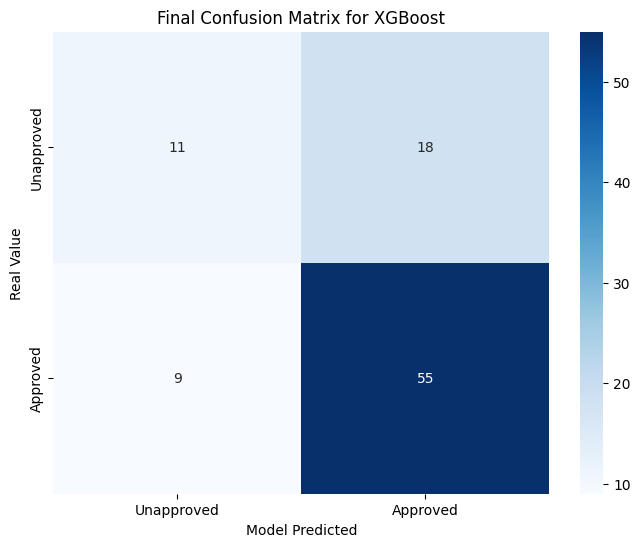

In [155]:

best_xgb_norm_model = gridcv_xgb_norm.best_estimator_
best_xgb_unnorm_model = gridcv_xgb_unnorm.best_estimator_


y_predict_norm = best_xgb_norm_model.predict(X_test)
y_predict_unnorm = best_xgb_unnorm_model.predict(X_test)

y_predict_proba_test = best_xgb_norm_model.predict_proba(X_test)[:, 1]

print("Final Report for XGBoost")

print(classification_report(y_test , y_predict_norm , target_names=["(0) Unapproved" , "(1) Approved"]))

##AUC Score

auc = roc_auc_score(y_test, y_predict_proba_test)*100
print(f"Final AUC for Test Data : {auc:.2f}")

##Confusion Matrix for normalized data

confusion_lgr = confusion_matrix(y_test , y_predict_norm)
fig,ax = plt.subplots(figsize=(8,6))

sns.heatmap(
    confusion_lgr,
    annot=True, fmt='d', 
    cmap='Blues',
    xticklabels=["Unapproved" , "Approved"],
    yticklabels=["Unapproved" , "Approved"])

plt.xlabel("Model Predicted")
plt.ylabel("Real Value")
plt.title("Final Confusion Matrix for XGBoost")
plt.show()




## Random Forest ##

Final Report for Random Forest
                precision    recall  f1-score   support

(0) Unapproved       0.67      0.41      0.51        29
  (1) Approved       0.77      0.91      0.83        64

      accuracy                           0.75        93
     macro avg       0.72      0.66      0.67        93
  weighted avg       0.74      0.75      0.73        93

Final AUC for Test Data : 70.04


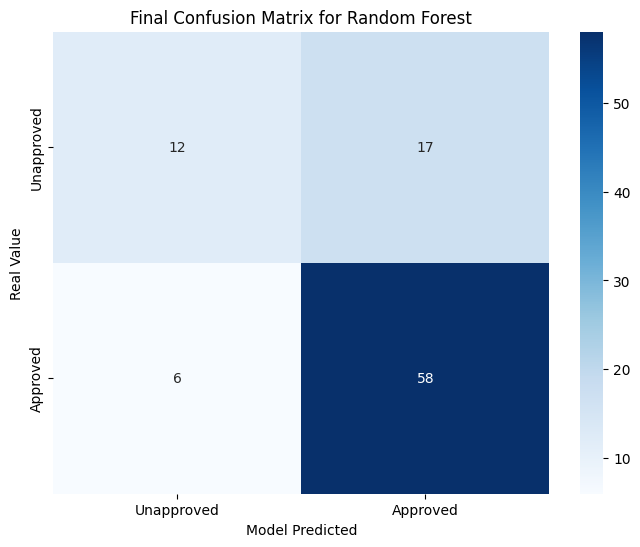

In [156]:
best_rf_norm_model = gridcv_rf_norm.best_estimator_
best_rf_unnorm_model = gridcv_rf_unnorm.best_estimator_

y_predict_norm = best_rf_norm_model.predict(X_test)
y_predict_unnorm = best_rf_unnorm_model.predict(X_test)

y_predict_proba_test = best_rf_norm_model.predict_proba(X_test)[:, 1]

print("Final Report for Random Forest")

print(classification_report(y_test , y_predict_norm , target_names=["(0) Unapproved" , "(1) Approved"]))

##AUC Score

auc = roc_auc_score(y_test, y_predict_proba_test)*100
print(f"Final AUC for Test Data : {auc:.2f}")

##Confusion Matrix for normalized data

confusion_lgr = confusion_matrix(y_test , y_predict_norm)
fig,ax = plt.subplots(figsize=(8,6))

sns.heatmap(
    confusion_lgr,
    annot=True, fmt='d', 
    cmap='Blues',
    xticklabels=["Unapproved" , "Approved"],
    yticklabels=["Unapproved" , "Approved"])

plt.xlabel("Model Predicted")
plt.ylabel("Real Value")
plt.title("Final Confusion Matrix for Random Forest")
plt.show()

## KNN ##

Final Report for KNN
                precision    recall  f1-score   support

(0) Unapproved       0.91      0.34      0.50        29
  (1) Approved       0.77      0.98      0.86        64

      accuracy                           0.78        93
     macro avg       0.84      0.66      0.68        93
  weighted avg       0.81      0.78      0.75        93

Final AUC for Test Data : 71.85


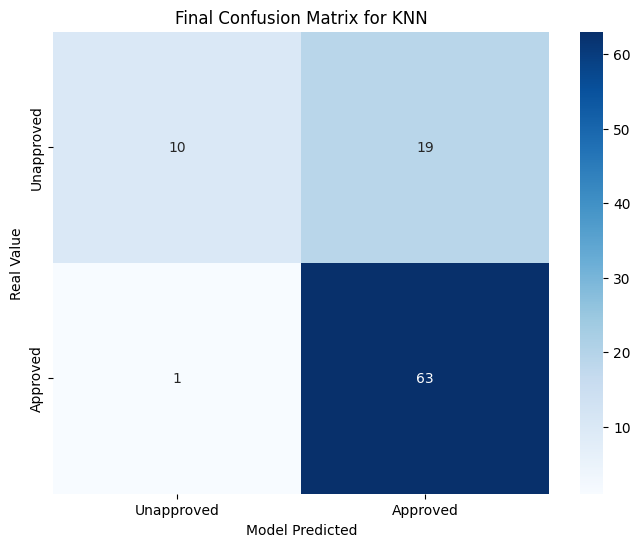

In [157]:
best_knn_norm_model = gridcv_knn_norm.best_estimator_
best_knn_unnorm_model = gridcv_knn_unnorm.best_estimator_

y_predict_norm = best_knn_norm_model.predict(X_test)
y_predict_unnorm = best_knn_unnorm_model.predict(X_test)

y_predict_proba_test = best_knn_norm_model.predict_proba(X_test)[:, 1]

print("Final Report for KNN")

print(classification_report(y_test , y_predict_norm , target_names=["(0) Unapproved" , "(1) Approved"]))

##AUC Score

auc = roc_auc_score(y_test, y_predict_proba_test)*100
print(f"Final AUC for Test Data : {auc:.2f}")

##Confusion Matrix for normalized data

confusion_lgr = confusion_matrix(y_test , y_predict_norm)
fig,ax = plt.subplots(figsize=(8,6))

sns.heatmap(
    confusion_lgr,
    annot=True, fmt='d', 
    cmap='Blues',
    xticklabels=["Unapproved" , "Approved"],
    yticklabels=["Unapproved" , "Approved"])

plt.xlabel("Model Predicted")
plt.ylabel("Real Value")
plt.title("Final Confusion Matrix for KNN")
plt.show()

### ANN ###

Final Report for ANN
                precision    recall  f1-score   support

(0) Unapproved       0.63      0.41      0.50        29
  (1) Approved       0.77      0.89      0.83        64

      accuracy                           0.74        93
     macro avg       0.70      0.65      0.66        93
  weighted avg       0.73      0.74      0.72        93

Final AUC for Test Data : 62.55


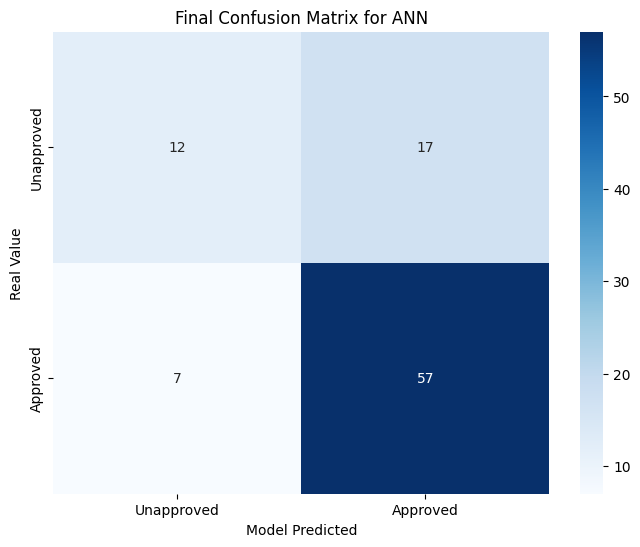

In [158]:
best_ann_norm_model = gridcv_ann_norm.best_estimator_
best_ann_unnorm_model = gridcv_ann_unnorm.best_estimator_

y_predict_norm = best_ann_norm_model.predict(X_test)
y_predict_unnorm = best_ann_unnorm_model.predict(X_test)

y_predict_proba_test = best_ann_norm_model.predict_proba(X_test)[:, 1]

print("Final Report for ANN")

print(classification_report(y_test , y_predict_norm , target_names=["(0) Unapproved" , "(1) Approved"]))

##AUC Score

auc = roc_auc_score(y_test, y_predict_proba_test)*100
print(f"Final AUC for Test Data : {auc:.2f}")

##Confusion Matrix for normalized data

confusion_lgr = confusion_matrix(y_test , y_predict_norm)
fig,ax = plt.subplots(figsize=(8,6))

sns.heatmap(
    confusion_lgr,
    annot=True, fmt='d', 
    cmap='Blues',
    xticklabels=["Unapproved" , "Approved"],
    yticklabels=["Unapproved" , "Approved"])

plt.xlabel("Model Predicted")
plt.ylabel("Real Value")
plt.title("Final Confusion Matrix for ANN")
plt.show()

# 📊 Model Comparison

| Model                  | Validation AUC | Test AUC | Accuracy | TN  | FP  | FN  | TP  | Key Insight |
|-------------------------|----------------|----------|----------|-----|-----|-----|-----|-------------|
| **Logistic Regression** | 0.74           | 0.729    | 78%      |  2  | 18  | 11  | 62  | Stable, interpretable, strong baseline |
| **XGBoost**             | 0.74           | 0.710    | 71%      |  9  | 18  | 11  | 55  | Good but slightly weaker than LR/KNN |
| **Random Forest**       | 0.73           | 0.700    | 75%      |  6  | 17  | 12  | 58  | Balanced, but lower AUC |
| **KNN**                 | 0.75           | 0.718    | **78%**  | 19  |  1  | 10  | 63  | Best accuracy, very low false positives |
| **ANN**                 | 0.68           | 0.625    | 74%      | 17  |  7  | 12  | 57  | Underperforms, possible overfitting |

---

# 🔎 Overall Conclusion
- **KNN (Normalized)**: Best predictive performance with highest accuracy and lowest false positives.  
- **Logistic Regression (Normalized)**: Strong baseline with good AUC and interpretability.  
- **Tree-based models (XGBoost & RF)**: Moderate performance, not as strong as KNN/LR.  
- **ANN**: Weakest, likely due to limited dataset size/complexity.  
